                           PROJET 2 
     Analysez des données de systèmes éducatifs - EdTech (Academy)

# I - Importation et chargement des données

In [1]:
# Importation des packages
import pandas as pd #version 1.4.4

import numpy as np #version 1.21.5
import matplotlib.pyplot as plt # version 3.5.2
import seaborn as sns

from datetime import date #Version 2.8.2

In [2]:
#Chargement du jeu de données
csdata = pd.read_csv('/Users/Leyla/Desktop/Openclassrooms/Projet 2/Projet+Python_Dataset_Edstats_csv-2/EdStatsCountry-Series.csv')
cdata = pd.read_csv('/Users/Leyla/Desktop/Openclassrooms/Projet 2/Projet+Python_Dataset_Edstats_csv-2/EdStatsCountry.csv')
data = pd.read_csv('/Users/Leyla/Desktop/Openclassrooms/Projet 2/Projet+Python_Dataset_Edstats_csv-2/EdStatsData.csv')
fndata = pd.read_csv('/Users/Leyla/Desktop/Openclassrooms/Projet 2/Projet+Python_Dataset_Edstats_csv-2/EdStatsFootNote.csv')
sdata = pd.read_csv('/Users/Leyla/Desktop/Openclassrooms/Projet 2/Projet+Python_Dataset_Edstats_csv-2/EdStatsSeries.csv')

In [3]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.set_option('max_colwidth', None)

# II - Analyse des données du fichier Country-Series

## 1. Description des informations du tableau

In [4]:
# Affichage de la taille du tableau (nombre de lignes & nombre de colonnes)
csdata.shape

(613, 4)

In [5]:
#Affichage des noms et les types de colonne
csdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  613 non-null    object 
 1   SeriesCode   613 non-null    object 
 2   DESCRIPTION  613 non-null    object 
 3   Unnamed: 3   0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 19.3+ KB


## 2. Validation de la qualité du jeu de données

### A) Données manquantes

In [6]:
# Verification des taux valeurs manquantes par colonne 
csPourcentage = (csdata.isnull().sum() /len(csdata))*100
csPourcentage

CountryCode      0.0
SeriesCode       0.0
DESCRIPTION      0.0
Unnamed: 3     100.0
dtype: float64

In [7]:
cssPourcentage = (csdata.notnull().sum() /len(csdata))*100
cssPourcentage

CountryCode    100.0
SeriesCode     100.0
DESCRIPTION    100.0
Unnamed: 3       0.0
dtype: float64

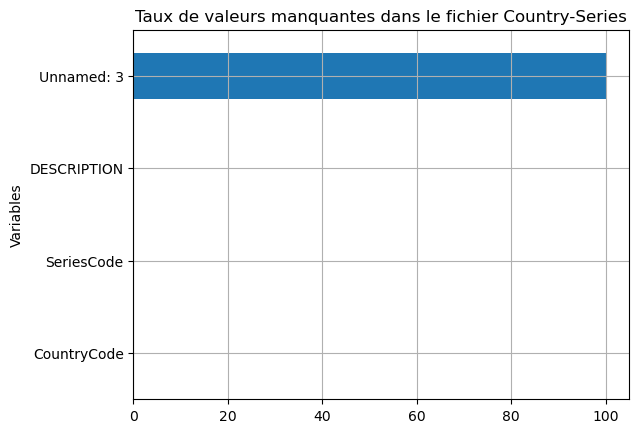

In [8]:
csPourcentage.sort_values(ascending=True).plot(kind='barh')
plt.ylabel('Variables')
plt.title("Taux de valeurs manquantes dans le fichier Country-Series")
plt.grid()
plt.show()

In [9]:
# Vérification du taux valeurs manquantes totales du tableau
Totcsnull=(csPourcentage.sum()/csdata.shape[1])
Totcsnull

25.0

In [10]:
Totcssnull=(cssPourcentage.sum()/csdata.shape[1])
Totcssnull

75.0

In [11]:
# Suppression de la colonne vide
csdata = csdata.drop(columns='Unnamed: 3')

In [12]:
# Verification des taux valeurs manquantes par colonnes 
csPourcentage = (csdata.isnull().sum() /len(csdata))*100
csPourcentage
Totcsnull=(csPourcentage.sum()/csdata.shape[1])
Totcsnull

0.0

### B) Données dupliquées 

In [13]:
# Verification des valeurs dupliqueés dans le jeu de données 
csdata.duplicated().sum()

0

In [14]:
csdata.duplicated(['CountryCode','SeriesCode']).sum()

0

## 3. Sélection des informations qui semblent pertinentes pour répondre à la problématique 

# III - Analyse des données du fichier Country

## 1. Description des informations du tableau

In [15]:
# Affichage de la taille du tableau (nombre de lignes & nombre de colonnes)
cdata.shape

(241, 32)

In [16]:
#Affichage des noms et les types de colonne
cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

In [17]:
cdata.describe()

,National accounts reference year,Latest industrial data,Latest trade data,Unnamed: 31
count,32.00000,107.000000,185.000000,0.0
mean,2001.53125,2008.102804,2010.994595,NaN
std,5.24856,2.616834,2.569675,NaN
min,1987.00000,2000.000000,1995.000000,NaN
25%,1996.75000,2007.500000,2011.000000,NaN
50%,2002.00000,2009.000000,2012.000000,NaN
75%,2005.00000,2010.000000,2012.000000,NaN
max,2012.00000,2010.000000,2012.000000,NaN


## 2. Validation de la qualité du jeu de données

### A) Données manquantes

In [18]:
# Verification des taux valeurs manquantes par colonne 
cPourcentage = (cdata.isnull().sum() /len(cdata))*100
cPourcentage

Country Code                                           0.000000
Short Name                                             0.000000
Table Name                                             0.000000
Long Name                                              0.000000
2-alpha code                                           1.244813
Currency Unit                                         10.788382
Special Notes                                         39.834025
Region                                                11.203320
Income Group                                          11.203320
WB-2 code                                              0.414938
National accounts base year                           14.937759
National accounts reference year                      86.721992
SNA price valuation                                   18.257261
Lending category                                      40.248963
Other groups                                          75.933610
System of National Accounts             

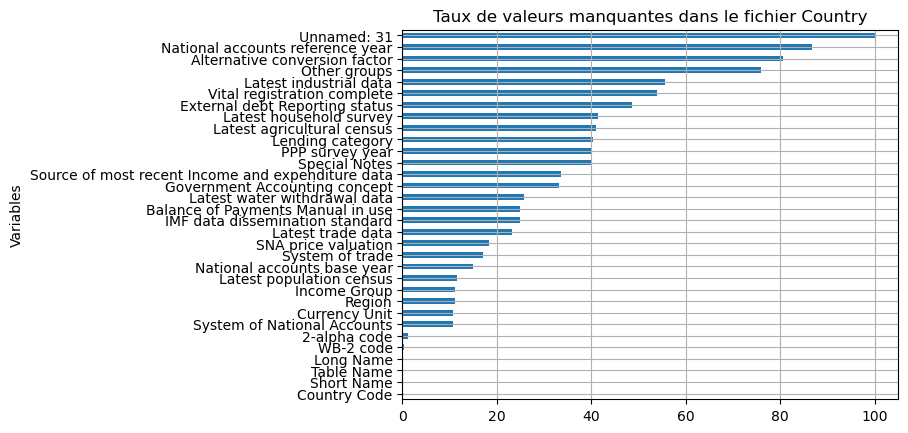

In [19]:
cPourcentage.sort_values(ascending=True).plot(kind='barh')
plt.ylabel('Variables')
plt.title("Taux de valeurs manquantes dans le fichier Country")
plt.grid()
plt.show()

In [20]:
# Verification du taux valeurs manquantes totales du tableau
Totcnull=(cPourcentage.sum()/cdata.shape[1])
Totcnull

30.523858921161825

In [21]:
# Suppression de la colonne vide
cdata = cdata.drop(columns='Unnamed: 31')

### B) Données dupliquées  

In [22]:
# Verification des valeurs dupliqueés dans le jeu de données 
cdata.duplicated().sum()

0

In [23]:
cdata.duplicated(['Country Code','Table Name']).sum()

0

## 3. Sélection des informations qui semblent pertinentes pour répondre à la problématique  

In [24]:
RTN = cdata.groupby("Region")["Table Name"].count().sort_values()
RTN

Region
North America                  3
South Asia                     8
Middle East & North Africa    21
East Asia & Pacific           36
Latin America & Caribbean     41
Sub-Saharan Africa            48
Europe & Central Asia         57
Name: Table Name, dtype: int64

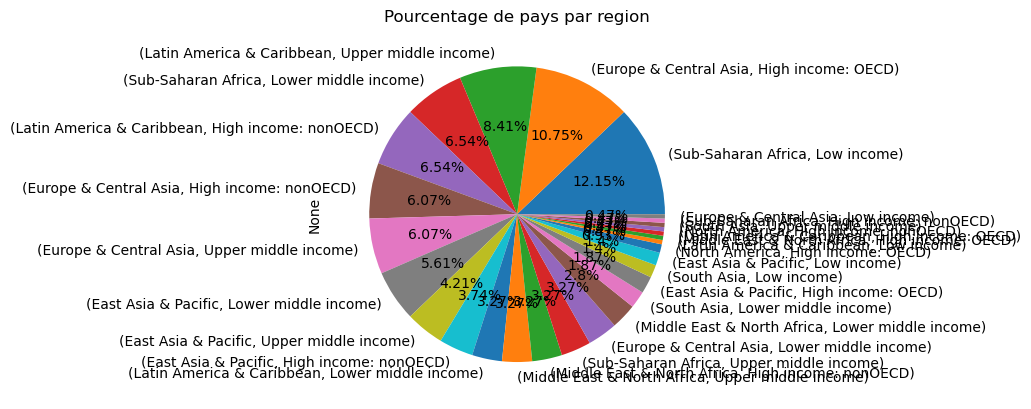

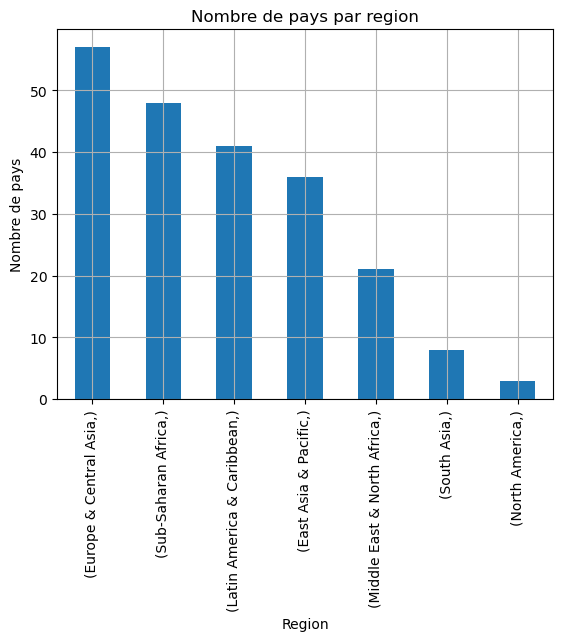

In [25]:
# Diagramme en secteurs
cdata[["Region","Income Group"]].value_counts(normalize=True).plot(kind='pie',autopct = lambda x: str(round(x, 2)) + '%')
# Cette ligne assure que le pie chart est un cercle plutôt qu'une ellipse
plt.title("Pourcentage de pays par region")
plt.show() # Affiche le graphique

cdata[["Region"]].value_counts().plot(kind='bar')
plt.ylabel('Nombre de pays')
plt.title("Nombre de pays par region")
plt.grid()
plt.show()

In [26]:
RIG = cdata.groupby("Region")["Income Group","Table Name"]
RIGdata = RIG.value_counts()

/var/folders/60/mq_jpp_j34l34j4rjr1bt70m0000gn/T/ipykernel_10609/2582061650.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  RIG = cdata.groupby("Region")["Income Group","Table Name"]


In [27]:
pd.options.display.max_rows = 1000
RIGdata

Region                      Income Group          Table Name                    
East Asia & Pacific         High income: OECD     Australia                         1
                                                  Japan                             1
                            Upper middle income   American Samoa                    1
                                                  Fiji                              1
                                                  Malaysia                          1
                                                  Marshall Islands                  1
                                                  Palau                             1
                                                  Thailand                          1
                                                  Tonga                             1
                                                  Tuvalu                            1
                                                  China    

In [28]:
RIGdata.sort_values().loc[:,(['High income: OECD']),:].iloc[:10]

Region                      Income Group       Table Name    
East Asia & Pacific         High income: OECD  Australia         1
North America               High income: OECD  Canada            1
                                               United States     1
Middle East & North Africa  High income: OECD  Israel            1
Latin America & Caribbean   High income: OECD  Chile             1
Europe & Central Asia       High income: OECD  Austria           1
                                               Belgium           1
                                               Czech Republic    1
                                               Denmark           1
                                               Estonia           1
dtype: int64

In [29]:
#Extraction de colonnes pertinentes du fichier country
cdata.rename(columns={'Table Name':'Country Name'}, inplace=True)
extractioncdata=cdata.iloc[:,[0,7,8]]
extractioncdata

,Country Code,Region,Income Group
0,ABW,Latin America & Caribbean,High income: nonOECD
1,AFG,South Asia,Low income
2,AGO,Sub-Saharan Africa,Upper middle income
3,ALB,Europe & Central Asia,Upper middle income
4,AND,Europe & Central Asia,High income: nonOECD
5,ARB,NaN,NaN
6,ARE,Middle East & North Africa,High income: nonOECD
7,ARG,Latin America & Caribbean,Upper middle income
8,ARM,Europe & Central Asia,Lower middle income
9,ASM,East Asia & Pacific,Upper middle income


In [30]:
extractioncdata.shape

(241, 3)

In [31]:
extractioncdata.isnull().sum()

Country Code     0
Region          27
Income Group    27
dtype: int64

In [32]:
extractioncdata = extractioncdata.dropna(thresh=2,axis=0)
extractioncdata

,Country Code,Region,Income Group
0,ABW,Latin America & Caribbean,High income: nonOECD
1,AFG,South Asia,Low income
2,AGO,Sub-Saharan Africa,Upper middle income
3,ALB,Europe & Central Asia,Upper middle income
4,AND,Europe & Central Asia,High income: nonOECD
6,ARE,Middle East & North Africa,High income: nonOECD
7,ARG,Latin America & Caribbean,Upper middle income
8,ARM,Europe & Central Asia,Lower middle income
9,ASM,East Asia & Pacific,Upper middle income
10,ATG,Latin America & Caribbean,High income: nonOECD


In [33]:
extractioncdata.shape

(214, 3)

# IV - Analyse des données du fichier FootNote

## 1. Description des informations du tableau

In [34]:
# Affichage de la taille du tableau (nombre de lignes & nombre de colonnes)
fndata.shape

(643638, 5)

In [35]:
#Affichage des noms et les types de colonne
fndata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CountryCode  643638 non-null  object 
 1   SeriesCode   643638 non-null  object 
 2   Year         643638 non-null  object 
 3   DESCRIPTION  643638 non-null  object 
 4   Unnamed: 4   0 non-null       float64
dtypes: float64(1), object(4)
memory usage: 24.6+ MB


## 2. Validation de la qualité du jeu de données

### A) Données manquantes

In [36]:
# Vérification des taux valeurs manquantes par colonnes 
fnPourcentage = (fndata.isnull().sum() /len(fndata))*100
fnPourcentage

CountryCode      0.0
SeriesCode       0.0
Year             0.0
DESCRIPTION      0.0
Unnamed: 4     100.0
dtype: float64

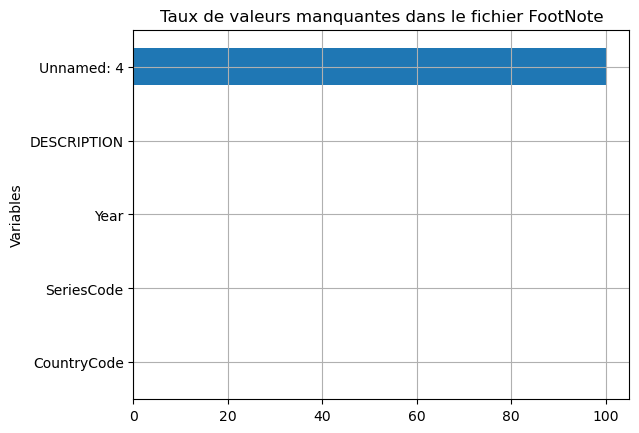

In [37]:
fnPourcentage.sort_values(ascending=True).plot(kind='barh')
plt.ylabel('Variables')
plt.title("Taux de valeurs manquantes dans le fichier FootNote")
plt.grid()
plt.show()

In [38]:
# Vérification du taux valeurs manquantes totales du tableau
Totfnnull=(fnPourcentage.sum()/fndata.shape[1])
Totfnnull

20.0

In [39]:
# Suppression de la colonne vide
fndata = fndata.drop(columns='Unnamed: 4')

### B) Données dupliquées  

In [40]:
# Vérification des valeurs dupliqueés dans le jeu de données 
fndata.duplicated().sum()

0

In [41]:
fndata.duplicated(['CountryCode','SeriesCode','Year']).sum()

0

## 3. Sélection des informations qui semblent pertinentes pour répondre à la problématique 

# V - Analyse des données du fichier Series

## 1. Description des informations du tableau 

In [42]:
# Affichage de la taille du tableau (nombre de lignes & nombre de colonnes)
sdata.shape

(3665, 21)

In [43]:
#Affichage des noms et des types de colonne
sdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  Notes from original source    

## 2. Validation de la qualité du jeu de données

### A) Données manquantes

In [44]:
# Vérification des taux valeurs manquantes par colonnes 
sPourcentage = (sdata.isnull().sum() /len(sdata))*100
sPourcentage

Series Code                              0.000000
Topic                                    0.000000
Indicator Name                           0.000000
Short definition                        41.173261
Long definition                          0.000000
Unit of measure                        100.000000
Periodicity                             97.298772
Base Period                             91.432469
Other notes                             84.938608
Aggregation method                      98.717599
Limitations and exceptions              99.618008
Notes from original source             100.000000
General comments                        99.618008
Source                                   0.000000
Statistical concept and methodology     99.372442
Development relevance                   99.918145
Related source links                    94.133697
Other web links                        100.000000
Related indicators                     100.000000
License Type                           100.000000


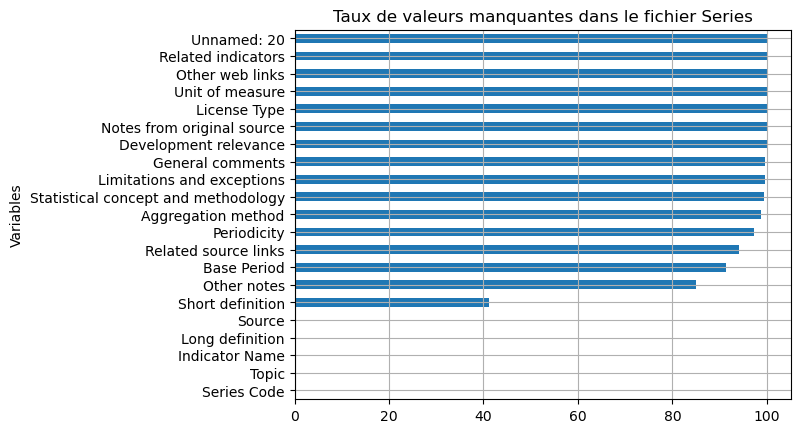

In [45]:
sPourcentage.sort_values(ascending=True).plot(kind='barh')
plt.ylabel('Variables')
plt.title("Taux de valeurs manquantes dans le fichier Series")
plt.grid()
plt.show()

In [46]:
# Verification du taux valeurs manquantes totales du tableau
Totsnull=(sPourcentage.sum()/sdata.shape[1])
Totsnull

71.72480997856168

In [47]:
sdata = sdata.dropna(thresh=2,axis=1)
sdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Series Code                          3665 non-null   object
 1   Topic                                3665 non-null   object
 2   Indicator Name                       3665 non-null   object
 3   Short definition                     2156 non-null   object
 4   Long definition                      3665 non-null   object
 5   Periodicity                          99 non-null     object
 6   Base Period                          314 non-null    object
 7   Other notes                          552 non-null    object
 8   Aggregation method                   47 non-null     object
 9   Limitations and exceptions           14 non-null     object
 10  General comments                     14 non-null     object
 11  Source                               3665 n

In [48]:
# Vérification des taux valeurs manquantes par colonnes 
sPourcentage = (sdata.isnull().sum() /len(sdata))*100
sPourcentage
Totsnull=(sPourcentage.sum()/sdata.shape[1])
Totsnull

60.414733969986365

### B) Données dupliquées 

In [49]:
# Vérification des valeurs dupliqueés dans le jeu de données 
sdata.duplicated().sum()

0

In [50]:
sdata.duplicated(['Indicator Name','Series Code']).sum()

0

## 3. Sélection des informations qui semblent pertinentes pour répondre à la problématique 

In [51]:
extractionsdata=sdata.iloc[:,[0,1,2,4]]
extractionsdata

,Series Code,Topic,Indicator Name,Long definition
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age 15-19 with no education,Percentage of female population age 15-19 with no education
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 with no education,Percentage of population age 15-19 with no education
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age 15+ with no education,Percentage of female population age 15+ with no education
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ with no education,Percentage of population age 15+ with no education
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age 20-24 with no education,Percentage of female population age 20-24 with no education
...,...,...,...,...
3660,UIS.XUNIT.USCONST.3.FSGOV,Expenditures,Government expenditure per upper secondary student (constant US$),"Average total (current, capital and transfers) general government expenditure per student in the given level of education, expressed in US$ at market exchange rates, in constant prices. The constant prices base year is normally three years before the year of the data release. Divide total government expenditure (in constant US$) for a given level of education (ex. primary, secondary) by total enrolment in that same level. This indicator is useful to compare average spending on one student between levels of education, over time, or between countries. Constant US$ allow comparing absolute values using a common currency, and taking into account the effect of inflation. This indicator should not be considered a unit cost, since it only includes what the government spends, and not total spending per student (including household contributions). Since it is a simple division of total government expenditure by the number of students at a given level, whether they attend public or private institutions, in countries where private provision and/or funding of education is higher the average amount per student will appear lower. For more information, consult the UNESCO Institute of Statistics website: http://www.uis.unesco.org/Education/"
3661,UIS.XUNIT.USCONST.4.FSGOV,Expenditures,Government expenditure per post-secondary non-tertiary student (constant US$),"Average total (current, capital and transfers) general government expenditure per student in the given level of education, expressed in US$ at market exchange rates, in constant prices. The constant prices base year is normally three years before the year of the data release. Divide total government expenditure (in constant US$) for a given level of education (ex. primary, secondary) by total enrolment in that same level. This indicator is useful to compare average spending on one student between levels of education, over time, or between countries. Constant US$ allow comparing absolute values using a common currency, and taking into account the effect of inflation. This indicator should not be considered a unit cost, since it only includes what the government spends, and not total spending per student (including household contributions). Since it is a simple division of total government expenditure by the number of students at a given level, whether they attend public or private institutions, in countries where private provision and/or funding of education is higher the average amount per student will appear lower. For more information, consult the UNESCO Institute of Statistics website: http://www.uis.unesco.org/Education/"
3662,UIS.XUNIT.USCONST.56.FSGOV,Expenditures,Government expenditure per tertiary student (constant US$),"Average total (current, capital and transfers) general government expenditure per student in the given level of education, expressed in US$ at market exchange rates, in constant prices. The constant prices base year is normally three years before the year of the data release. Divide total government expenditure (in cons

In [52]:
extractionsdata.groupby(["Topic"]).first()

,Series Code,Indicator Name,Long definition
Topic,,,
Attainment,BAR.NOED.1519.FE.ZS,Barro-Lee: Percentage of female population age 15-19 with no education,Percentage of female population age 15-19 with no education
Background,SE.COM.DURS,Duration of compulsory education (years),Number of years that children are legally obliged to attend school.
EMIS,UIS.AFR.SCHCENRESPR.1.PU,Africa Dataset: School census return rate from primary schools,"Share of all primary school questionnaires that were returned with at least some usable data and captured in the EMIS system. Data available for African countries only. For more information, consult the UNESCO Institute for Statistics' Regional Data Collections page."
Early Child Development (SABER),SABER.ERL.CHLD.GOAL1,SABER: (Early Childhood Development) Policy Goal 1: Establishing an Enabling Environment,"Data Interpretation: 1=Latent; 2=Emerging; 3=Established; 4=Advanced. For additional information, visit the SABER: (website: http://saber.worldbank.org/index.cfm"
Early Childhood Education,SE.PRE.ENRL,"Enrolment in pre-primary education, both sexes (number)","Total number of students enrolled in public and private pre-primary education institutions (ISCED 0.2) regardless of age. Within ISCED 0, early childhood educational development programmes are targeted at children aged 0 to 2 years; and pre-primary education programmes are targeted at children aged 3 years until the age to start ISCED 1."
Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita,NY.GNP.PCAP.CD,"GNI per capita, Atlas method (current US$)","GNI per capita (formerly GNP per capita) is the gross national income, converted to U.S. dollars using the World Bank Atlas method, divided by the midyear population. GNI is the sum of value added by all resident producers plus any product taxes (less subsidies) not included in the valuation of output plus net receipts of primary income (compensation of employees and property income) from abroad. GNI, calculated in national currency, is usually converted to U.S. dollars at official exchange rates for comparisons across economies, although an alternative rate is used when the official exchange rate is judged to diverge by an exceptionally large margin from the rate actually applied in international transactions. To smooth fluctuations in prices and exchange rates, a special Atlas method of conversion is used by the World Bank. This applies a conversion factor that averages the exchange rate for a given year and the two preceding years, adjusted for differences in rates of inflation between the country, and through 2000, the G-5 countries (France, Germany, Japan, the United Kingdom, and the United States). From 2001, these countries include the Euro area, Japan, the United Kingdom, and the United States."
Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators,NY.GDP.MKTP.KD,GDP (constant 2010 US$),"GDP at purchaser's prices is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources. Data are in constant 2010 U.S. dollars. Dollar figures for GDP are converted from domestic currencies using 2010 official exchange rates. For a few countries where the official exchange rate does not reflect the rate effectively applied to actual foreign exchange transactions, an alternative conversion factor is used."
Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators,NY.GDP.MKTP.CD,GDP (current US$),"GDP at purchaser's prices is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and d

In [53]:
#Combien de thème dans le fichier ?
extractionsdata['Topic'].value_counts().count()

37

In [54]:
#Combien d'indicateur par thème dans le fichier ?
extractionsdata['Topic'].value_counts()

Learning Outcomes                                                                               1046
Attainment                                                                                       733
Education Equality                                                                               426
Secondary                                                                                        256
Primary                                                                                          248
Population                                                                                       213
Tertiary                                                                                         158
Teachers                                                                                         137
Expenditures                                                                                      93
Engaging the Private Sector (SABER)                                                        

In [55]:
#Thème de recherche : Lycée (Secondary)
extractionsdata[extractionsdata['Topic'].isin(['Secondary'])]

,Series Code,Topic,Indicator Name,Long definition
2218,SE.ENR.PRSC.FM.ZS,Secondary,"Gross enrolment ratio, primary and secondary, gender parity index (GPI)","Ratio of female gross enrolment ratio for primary and secondary to male gross enrolment ratio for primary and secondary. It is calculated by dividing the female value for the indicator by the male value for the indicator. A GPI equal to 1 indicates parity between females and males. In general, a value less than 1 indicates disparity in favor of males and a value greater than 1 indicates disparity in favor of females."
2219,SE.ENR.SECO.FM.ZS,Secondary,"Gross enrolment ratio, secondary, gender parity index (GPI)","Ratio of female gross enrolment ratio for secondary to male gross enrolment ratio for secondary. It is calculated by dividing the female value for the indicator by the male value for the indicator. A GPI equal to 1 indicates parity between females and males. In general, a value less than 1 indicates disparity in favor of males and a value greater than 1 indicates disparity in favor of females."
2287,SE.SEC.AGES,Secondary,Official entrance age to lower secondary education (years),"Age at which students would enter lower secondary education, assuming they had started at the official entrance age for the lowest level of education, had studied full-time throughout and had progressed through the system without repeating or skipping a grade."
2288,SE.SEC.CMPT.LO.FE.ZS,Secondary,"Lower secondary completion rate, female (%)","Total number of new female entrants in the last grade of lower secondary education, regardless of age, expressed as percentage of the total female population of the theoretical entrance age to the last grade of lower secondary. This indicator is also known as ""Gross intake rate to the last grade of lower secondary general education."" The ratio can exceed 100 percent due to over-aged and under-aged children who enter lower secondary school late/early and/or repeat grades. Data limitations preclude adjusting for students who drop out during the final year of lower secondary education. Thus this rate is a proxy that should be taken as an upper estimate of the actual lower secondary completion rate."
2289,SE.SEC.CMPT.LO.MA.ZS,Secondary,"Lower secondary completion rate, male (%)","Total number of new male entrants in the last grade of lower secondary education, regardless of age, expressed as percentage of the total male population of the theoretical entrance age to the last grade of lower secondary. This indicator is also known as ""Gross intake rate to the last grade of lower secondary general education."" The ratio can exceed 100 percent due to over-aged and under-aged children who enter lower secondary school late/early and/or repeat grades. Data limitations preclude adjusting for students who drop out during the final year of lower secondary education. Thus this rate is a proxy that should be taken as an upper estimate of the actual lower secondary completion rate."
2290,SE.SEC.CMPT.LO.ZS,Secondary,"Lower secondary completion rate, both sexes (%)","Total number of new entrants in the last grade of lower secondary education, regardless of age, expressed as percentage of the total population of the theoretical entrance age to the last grade of lower secondary. This indicator is also known as ""Gross intake rate to the last grade of lower secondary general education."" The ratio can exceed 100 percent due to over-aged and under-aged children who enter lower secondary school late/early and/or repeat grades. Data limitations preclude adjusting for students who drop out during the final year of lower secondary education. Thus this rate is a proxy that should be taken as an upper estimate of the actual lower secondary completion rate."
2291,SE.SEC.DURS,Secondary,Theoretical duration of secondary education (years),Number of grades (years) in secondary education (ISCED 2 and 3).
2292,SE.SEC.DURS.LO,Secondary,Theoretical duration of lower secondary education

In [56]:
#Thème de recherche : Population
extractionsdata[extractionsdata['Topic'].isin(['Population'])]

,Series Code,Topic,Indicator Name,Long definition
2405,SP.POP.0305.FE.UN,Population,"Population, ages 3-5, female","Population, ages 3-5, female is the total number of females age 3-5."
2406,SP.POP.0305.MA.UN,Population,"Population, ages 3-5, male","Population, ages 3-5, male is the total number of males age 3-5."
2407,SP.POP.0305.TO.UN,Population,"Population, ages 3-5, total","Population, ages 3-5, total is the total population age 3-5."
2408,SP.POP.0406.FE.UN,Population,"Population, ages 4-6, female","Population, ages 4-6, female is the total number of females age 4-6."
2409,SP.POP.0406.MA.UN,Population,"Population, ages 4-6, male","Population, ages 4-6, male is the total number of males age 4-6."
2410,SP.POP.0406.TO.UN,Population,"Population, ages 4-6, total","Population, ages 4-6, total is the total population age 4-6."
2411,SP.POP.0509.FE.UN,Population,"Population, ages 5-9, female","Population, ages 5-9, female is the total number of females age 5-9."
2412,SP.POP.0509.MA.UN,Population,"Population, ages 5-9, male","Population, ages 5-9, male is the total number of males age 5-9."
2413,SP.POP.0509.TO.UN,Population,"Population, ages 5-9, total","Population, ages 5-9, total is the total population age 5-9."
2414,SP.POP.0510.FE.UN,Population,"Population, ages 5-10, female","Population, ages 5-10, female is the total number of females age 5-10."


In [57]:
#Thème de recherche : Étude supérieure (Tertiary)
extractionsdata[extractionsdata['Topic'].isin(['Tertiary'])]

,Series Code,Topic,Indicator Name,Long definition
2220,SE.ENR.TERT.FM.ZS,Tertiary,"Gross enrolment ratio, tertiary, gender parity index (GPI)","Ratio of female gross enrolment ratio for tertiary to male gross enrolment ratio for tertiary. It is calculated by dividing the female value for the indicator by the male value for the indicator. A GPI equal to 1 indicates parity between females and males. In general, a value less than 1 indicates disparity in favor of males and a value greater than 1 indicates disparity in favor of females."
2284,SE.SCH.LIFE,Tertiary,"School life expectancy, primary to tertiary, both sexes (years)","Number of years a person of school entrance age can expect to spend within the specified level of education. For a child of a certain age a, the school life expectancy is calculated as the sum of the age specific enrolment rates for the levels of education specified. The part of the enrolment that is not distributed by age is divided by the school-age population for the level of education they are enrolled in, and multiplied by the duration of that level of education. The result is then added to the sum of the age-specific enrolment rates. A relatively high SLE indicates greater probability for children to spend more years in education and higher overall retention within the education system. It must be noted that the expected number of years does not necessarily coincide with the expected number of grades of education completed, because of repetition. Since school life expectancy is an average based on participation in different levels of education, the expected number of years of schooling may be pulled down by the magnitude of children who never go to school. Those children who are in school may benefit from many more years of education than the average."
2285,SE.SCH.LIFE.FE,Tertiary,"School life expectancy, primary to tertiary, female (years)","Number of years a person of school entrance age can expect to spend within the specified level of education. For a child of a certain age a, the school life expectancy is calculated as the sum of the age specific enrolment rates for the levels of education specified. The part of the enrolment that is not distributed by age is divided by the school-age population for the level of education they are enrolled in, and multiplied by the duration of that level of education. The result is then added to the sum of the age-specific enrolment rates. A relatively high SLE indicates greater probability for children to spend more years in education and higher overall retention within the education system. It must be noted that the expected number of years does not necessarily coincide with the expected number of grades of education completed, because of repetition. Since school life expectancy is an average based on participation in different levels of education, the expected number of years of schooling may be pulled down by the magnitude of children who never go to school. Those children who are in school may benefit from many more years of education than the average."
2286,SE.SCH.LIFE.MA,Tertiary,"School life expectancy, primary to tertiary, male (years)","Number of years a person of school entrance age can expect to spend within the specified level of education. For a child of a certain age a, the school life expectancy is calculated as the sum of the age specific enrolment rates for the levels of education specified. The part of the enrolment that is not distributed by age is divided by the school-age population for the level of education they are enrolled in, and multiplied by the duration of that level of education. The result is then added to the sum of the age-specific enrolment rates. A relatively high SLE indicates greater probability for children to spend more years in education and higher overall retention within the education system. It must be noted that the expected number of years does not necessarily coincide with the expected number of grades of education 

In [58]:
#Thème de recherche : Infrastructure: Communications
extractionsdata[extractionsdata['Topic'].isin(['Infrastructure: Communications'])]

,Series Code,Topic,Indicator Name,Long definition
610,IT.CMP.PCMP.P2,Infrastructure: Communications,Personal computers (per 100 people),Personal computers are self-contained computers designed to be used by a single individual.
611,IT.NET.USER.P2,Infrastructure: Communications,Internet users (per 100 people),"Internet users are individuals who have used the Internet (from any location) in the last 3 months. The Internet can be used via a computer, mobile phone, personal digital assistant, games machine, digital TV etc."


In [59]:
# Recherche avancée avec codes clés : 1524 (Âge)
extractionsdata[extractionsdata['Series Code'].str.contains('1524')]

,Series Code,Topic,Indicator Name,Long definition
2209,SE.ADT.1524.LT.FE.ZS,Literacy,"Youth literacy rate, population 15-24 years, female (%)","Number of females age 15 to 24 years who can both read and write with understanding a short simple statement on their everyday life, divided by the female population in that age group. Generally, ‘literacy’ also encompasses ‘numeracy’, the ability to make simple arithmetic calculations. Divide the number of people aged 15 to 24 years who are literate by the total population in the same age group and multiply the result by 100."
2210,SE.ADT.1524.LT.FM.ZS,Literacy,"Youth literacy rate, population 15-24 years, gender parity index (GPI)","Ratio of female youth literacy rate to male youth literacy rate. It is calculated by dividing the female value for the indicator by the male value for the indicator. A GPI equal to 1 indicates parity between females and males. In general, a value less than 1 indicates disparity in favor of males and a value greater than 1 indicates disparity in favor of females."
2211,SE.ADT.1524.LT.MA.ZS,Literacy,"Youth literacy rate, population 15-24 years, male (%)","Number of males age 15 to 24 years who can both read and write with understanding a short simple statement on their everyday life, divided by the male population in that age group. Generally, ‘literacy’ also encompasses ‘numeracy’, the ability to make simple arithmetic calculations. Divide the number of people aged 15 to 24 years who are literate by the total population in the same age group and multiply the result by 100."
2212,SE.ADT.1524.LT.ZS,Literacy,"Youth literacy rate, population 15-24 years, both sexes (%)","Number of people age 15 to 24 years who can both read and write with understanding a short simple statement on their everyday life, divided by the population in that age group. Generally, ‘literacy’ also encompasses ‘numeracy’, the ability to make simple arithmetic calculations. Divide the number of people aged 15 to 24 years who are literate by the total population in the same age group and multiply the result by 100."
2504,SP.POP.1524.FE.UN,Population,"Population, ages 15-24, female","Population, ages 15-24, female is the total number of females age 15-24."
2505,SP.POP.1524.MA.UN,Population,"Population, ages 15-24, male","Population, ages 15-24, male is the total number of males age 15-24."
2506,SP.POP.1524.TO.UN,Population,"Population, ages 15-24, total","Population, ages 15-24, total is the total population age 15-24."


# VI - Analyse des données du fichier Data

## 1. Description des informations du tableau 

In [60]:
# Affichage du nombre de lignes & nombre de colonnes
data.shape

(886930, 70)

In [61]:
#Affichage des noms et les types de colonne
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

In [62]:
data['Country Code'].value_counts().sum()

886930

In [63]:
#Combien de pays dans le fichier data ?
data['Country Code'].value_counts().duplicated().sum()

241

In [64]:
#Variables quantitatives
data.describe()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
count,7.228800e+04,3.553700e+04,3.561900e+04,3.554500e+04,3.573000e+04,8.730600e+04,3.748300e+04,3.757400e+04,3.757600e+04,3.680900e+04,8.912200e+04,3.877700e+04,3.751100e+04,3.846000e+04,3.860600e+04,9.029600e+04,3.937200e+04,3.864100e+04,3.855200e+04,3.754000e+04,1.244050e+05,7.443700e+04,7.554300e+04,7.579300e+04,7.746200e+04,1.313610e+05,7.680700e+04,7.345300e+04,8.491400e+04,1.188390e+05,1.766760e+05,1.235090e+05,1.242050e+05,1.303630e+05,1.288140e+05,1.841080e+05,1.403120e+05,1.372720e+05,1.343870e+05,1.421080e+05,2.424420e+05,1.460120e+05,1.472640e+05,1.375090e+05,1.137890e+05,1.310580e+05,1.646000e+04,143.000000,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,0.0
mean,1.974772e+09,4.253638e+09,4.592365e+09,5.105006e+09,5.401493e+09,2.314288e+09,5.731808e+09,6.124437e+09,6.671489e+09,7.436724e+09,3.283898e+09,7.664969e+09,7.913722e+09,7.856908e+09,8.118002e+09,3.622763e+09,9.156550e+09,1.014901e+10,1.104709e+10,1.195436e+10,9.084424e+09,1.571674e+10,1.604668e+10,1.643532e+10,1.684022e+10,1.052543e+10,1.874630e+10,2.027385e+10,1.794678e+10,1.331558e+10,9.423384e+09,1.384867e+10,1.428299e+10,1.449393e+10,1.589729e+10,1.188637e+10,1.684674e+10,1.872300e+10,2.029794e+10,1.894907e+10,1.189592e+10,2.117911e+10,2.176323e+10,2.425332e+10,2.678449e+10,2.353720e+10,1.934411e+11,2.160839,5.780697e+02,6.054774e+02,6.315916e+02,6.556516e+02,6.751516e+02,6.911287e+02,7.040640e+02,7.145788e+02,7.224868e+02,7.271290e+02,7.283779e+02,7.266484e+02,7.228327e+02,7.176899e+02,7.113072e+02,7.034274e+02,6.940296e+02,NaN
std,1.211687e+11,1.804814e+11,1.914083e+11,2.059170e+11,2.112150e+11,1.375059e+11,2.215546e+11,2.325489e+11,2.473986e+11,2.660957e+11,1.780774e+11,2.744142e+11,2.790549e+11,2.823809e+11,2.940635e+11,2.002929e+11,3.264675e+11,3.535351e+11,3.804257e+11,4.014873e+11,3.665667e+11,4.881357e+11,5.012055e+11,5.121962e+11,5.292982e+11,4.285218e+11,5.812586e+11,6.142357e+11,5.859148e+11,5.153472e+11,4.442374e+11,5.449242e+11,5.622886e+11,5.803607e+11,6.278337e+11,5.576181e+11,6.851484e+11,7.465688e+11,7.944132e+11,7.623650e+11,6.218710e+11,8.555853e+11,8.833955e+11,9.513016e+11,1.023180e+12,9.732465e+11,2.839188e+12,0.810584,1.475072e+04,1.577305e+04,1.678556e+04,1.778666e+04,1.874408e+04,1.965409e+04,2.052941e+04,2.136851e+04,2.215845e+04,2.287990e+04,2.352338e+04,2.408149e+04,2.455897e+04,2.496587e+04,2.530183e+04,2.556069e+04,2.574189e+04,NaN
min,-1.435564e+00,-1.594625e+00,-3.056522e+00,-4.032582e+00,-4.213563e+00,-3.658569e+00,-2.950945e+00,-3.174870e+00,-3.558749e+00,-2.973612e+00,-1.404240e+00,-1.478345e+00,-2.358765e+00,-2.867273e+00,-2.800548e+00,-2.216315e+00,-1.556722e+00,-1.410886e+00,-1.425202e+00,-1.562425e+00,-1.803750e+00,-5.814339e+00,-5.089333e+00,-6.184857e+00,-4.792691e+00,-2.697722e+00,-3.820174e+00,-2.517245e+00,-6.086200e+04,-6.526000e+04,-6.759300e+04,-6.973700e+04,-9.214300e+04,-1.111860e+05,-1.262600e+05,-1.347240e+05,-3.708940e+05,-3.882170e+05,-4.088540e+05,-4.561240e+05,-4.969050e+05,-5.709940e+05,-6.049930e+05,-6.157480e+05,-8.900000e+01,-2.467847e+00,-1.797539e+00,1.000000,-1.870000e+00,-2.000000e+00,-2.110000e+00,-2.150000e+00,-2.140000e+00,-2.090000e+00,-1.980000e+00,-1.830000e+00,-1.630000e+00,-1.440000e+00,-1.260000e+00,-1.090000e+00,-9.200000e-01,-7.800000e-01,-6.500000e-01,-5.500000e-01,-4.500000e-01,NaN
25%,8.900000e-01,8.853210e+00,9.240920e+00,9.595200e+00,9.861595e+00,1.400000e+00,9.312615e+00,9.519913e+00,1.000000e+01,1.000000e+01,1.770000e+00,9.468690e+00,9.989330e+00,9.581825e+00,9.068048e+0

In [65]:
#Variables qualitatives
data.loc[:,'Country Name':'Indicator Code'].describe()

,Country Name,Country Code,Indicator Name,Indicator Code
count,886930,886930,886930,886930
unique,242,242,3665,3665
top,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, both sexes (%)",UIS.NERA.2
freq,3665,3665,242,242


## 2. Validation de la qualité du jeu de données

### A) Données manquantes 

In [66]:
# Vérification des taux valeurs manquantes par colonnes 
Pourcentagenull = (data.isnull().sum() /len(data))*100
Pourcentagenull

Country Name        0.000000
Country Code        0.000000
Indicator Name      0.000000
Indicator Code      0.000000
1970               91.849639
1971               95.993258
1972               95.984012
1973               95.992356
1974               95.971497
1975               90.156382
1976               95.773849
1977               95.763589
1978               95.763364
1979               95.849842
1980               89.951631
1981               95.627953
1982               95.770692
1983               95.663694
1984               95.647233
1985               89.819264
1986               95.560867
1987               95.643286
1988               95.653321
1989               95.767422
1990               85.973527
1991               91.607342
1992               91.482642
1993               91.454455
1994               91.266278
1995               85.189248
1996               91.340128
1997               91.718287
1998               90.426076
1999               86.601085
2000          

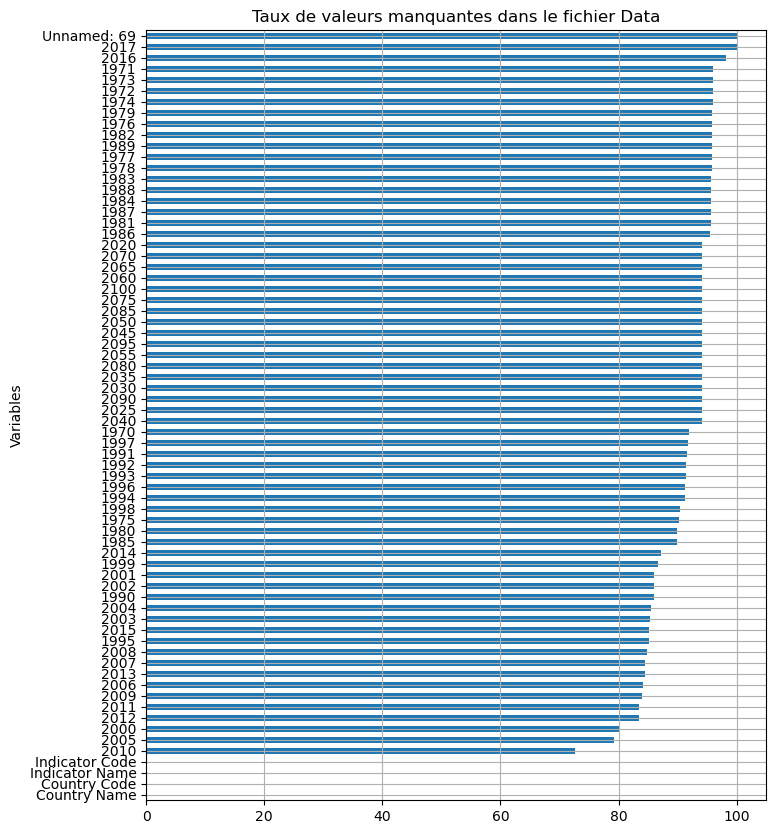

In [67]:
Pourcentagenull.sort_values(ascending=True).plot(kind='barh',figsize=(8, 10))
plt.ylabel('Variables')
plt.title("Taux de valeurs manquantes dans le fichier Data")
plt.grid()
plt.show()

In [68]:
# Vérification du taux valeurs manquantes totales du tableau
Totnull=(Pourcentagenull.sum()/data.shape[1])
Totnull

86.09985165522806

In [69]:
# Supprimez les colonnes vides 
data = data.dropna(thresh=2,axis=1)
data.shape

(886930, 69)

In [70]:
# Vérification des valeurs manquantes par ligne
data.isnull().sum(axis=1)

0         65
1         65
2         65
3         65
4         20
          ..
886925    61
886926    61
886927    61
886928    61
886929    61
Length: 886930, dtype: int64

In [71]:
# Supprimez les lignes avec valeurs manquantes 
data = data.dropna(thresh=5)

In [72]:
data.isnull().sum(axis=1)

4         20
5         20
6         20
7         20
12        20
          ..
886925    61
886926    61
886927    61
886928    61
886929    61
Length: 357405, dtype: int64

In [73]:
data.shape

(357405, 69)

Text(0.5, 1.0, 'Nombre de données par années')

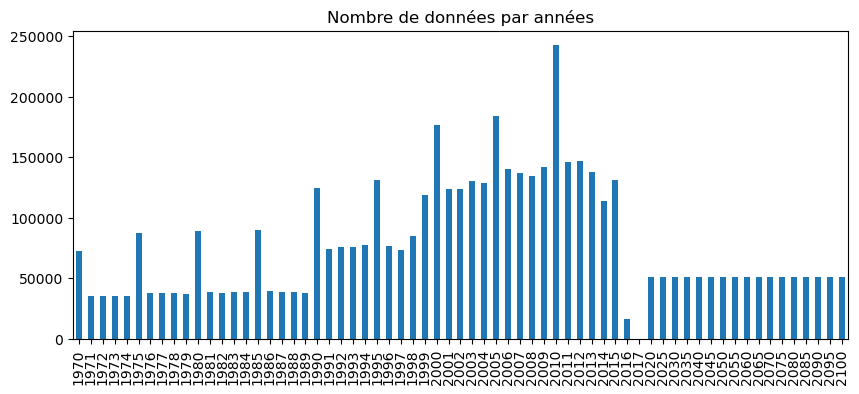

In [74]:
data.loc[:,'1970':'2100'].notnull().sum().plot(kind='bar',figsize=(10, 4))
plt.title('Nombre de données par années')

In [75]:
# Suppresssion des colonnes 2020 à 2100 
data = data.drop(data.loc[:,'2020':'2100'],axis=1)
# Suppresssion des colonnes 2016 à 2017 
data = data.drop(['2016','2017'],axis=1)
data

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sexes (%)",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.365540,60.999962,61.922680,62.693420,64.383186,65.617767,66.085152,66.608139,67.290451,68.510094,69.033211,69.944908,71.041870,71.693779,71.699097,71.995819,72.602837,70.032722,70.464821,72.645683,71.811760,73.903511,74.425201,75.110817,76.254318,77.245682,78.800522,80.051399,80.805389,81.607063,82.489487,82.685509,83.280342,84.011871,84.195961,85.211998,85.245140,86.101669,85.511940,85.320152,NaN
5,Arab World,ARB,"Adjusted net enrolment rate, primary, female (%)",SE.PRM.TENR.FE,43.351101,43.318150,44.640701,45.845718,46.449501,48.363892,50.046188,51.245281,52.242321,54.754372,56.486790,57.314659,58.226051,59.289230,60.748180,61.520870,62.734951,64.115883,65.099663,65.129204,65.827492,66.797028,63.260429,63.972111,67.033043,65.761559,68.780800,69.267052,70.435387,72.047287,73.275620,75.132980,76.641022,77.653580,78.485397,79.475769,79.608330,80.582420,81.473801,81.695686,82.871651,82.861389,84.401413,83.914032,83.820831,NaN
6,Arab World,ARB,"Adjusted net enrolment rate, primary, gender parity index (GPI)",UIS.NERA.1.GPI,0.658570,0.656400,0.663290,0.672040,0.672610,0.691760,0.699950,0.710140,0.718430,0.743740,0.759440,0.769250,0.779860,0.790710,0.799610,0.806770,0.816060,0.825130,0.834190,0.834760,0.844660,0.854320,0.826490,0.834080,0.859090,0.847310,0.872660,0.872690,0.884940,0.897370,0.904060,0.912750,0.919790,0.926300,0.927680,0.930840,0.929620,0.938460,0.942500,0.943470,0.947620,0.946700,0.962080,0.964090,0.966200,NaN
7,Arab World,ARB,"Adjusted net enrolment rate, primary, male (%)",SE.PRM.TENR.MA,65.826233,65.993584,67.301857,68.219078,69.059013,69.914551,71.499512,72.162064,72.717690,73.619972,74.379982,74.507133,74.662628,74.981827,75.972542,76.255493,76.875053,77.703857,78.039368,78.021889,77.933853,78.187492,76.541100,76.697418,78.028130,77.611900,78.817490,79.372040,79.593536,80.287529,81.051369,82.315048,83.324059,83.832230,84.604393,85.380287,85.635078,85.866692,86.444138,86.590691,87.452583,87.526520,87.728172,87.039879,86.753387,NaN
12,Arab World,ARB,"Adjusted net intake rate to Grade 1 of primary education, both sexes (%)",UIS.NIRA.1,52.448921,52.489750,52.635593,53.327000,54.184654,54.865627,58.701626,58.876965,59.452522,62.776375,62.559566,62.594330,62.447292,63.409138,65.837379,64.613091,65.926895,66.775635,66.447350,66.931831,67.080444,67.508705,67.653282,67.444687,68.652267,69.208015,68.651680,69.611557,66.867638,68.321686,70.737579,73.594200,74.976158,75.328583,76.428513,76.131767,75.222557,75.595695,74.893944,74.814552,76.197044,76.474968,77.319366,76.566711,76.620567,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886925,Zimbabwe,ZWE,"Youth illiterate population, 15-24 years, male (number)",UIS.LP.AG15T24.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47631.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38800.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,166679.000000,NaN,NaN,199464.000000,NaN
886926,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, both sexes (%)",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.021851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.411362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.930700,NaN,NaN,90.428120,NaN
886927,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, female (%)",SE.ADT.1524.LT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.812241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.353439,NaN,Na

### B) Données dupliquées 

In [76]:
# Vérification des valeurs dupliqueés dans le jeu de données 
data.duplicated(['Country Name','Indicator Name','Indicator Code']).sum()

0

## 3. Sélection des informations qui semblent pertinentes pour répondre à la problématique 

In [77]:
# Jointure entre les fichier data complet et extractioncdata qui est une extraction des colonnes pertinentes dans le fichier Country
Globdata= pd.merge(data, extractioncdata,on='Country Code')
Globdata
#(deplacer colonnes)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Region,Income Group
0,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, both sexes (%)",UIS.NERA.2,NaN,NaN,NaN,NaN,7.05911,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.260189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.059870,NaN,NaN,NaN,NaN,NaN,47.436790,50.627232,NaN,South Asia,Low income
1,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, female (%)",UIS.NERA.2.F,NaN,NaN,NaN,NaN,2.53138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.431810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.223100,NaN,NaN,NaN,NaN,NaN,34.073261,37.641541,NaN,South Asia,Low income
2,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, gender parity index (GPI)",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,0.22154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.386230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.379130,NaN,NaN,NaN,NaN,NaN,0.567060,0.598370,NaN,South Asia,Low income
3,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, male (%)",UIS.NERA.2.M,NaN,NaN,NaN,NaN,11.42652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.420429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.152851,NaN,NaN,NaN,NaN,NaN,60.087059,62.906952,NaN,South Asia,Low income
4,Afghanistan,AFG,"Adjusted net enrolment rate, primary, gender parity index (GPI)",UIS.NERA.1.GPI,NaN,NaN,NaN,NaN,0.19066,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.351840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,South Asia,Low income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347343,Zimbabwe,ZWE,"Youth illiterate population, 15-24 years, male (number)",UIS.LP.AG15T24.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47631.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38800.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,166679.00000,NaN,NaN,199464.000000,NaN,Sub-Saharan Africa,Low income
347344,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, both sexes (%)",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.021851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.411362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.93070,NaN,NaN,90.428120,NaN,Sub-Saharan Africa,Low income
347345,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, female (%)",SE.ADT.1524.LT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.812241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.353439,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.12456,NaN,NaN,93.188350,NaN,Sub-Saharan Africa,Low income
347346,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, gender parity index (GPI)",SE.ADT.1524.LT.FM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.903920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.977340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.02828,NaN,NaN,1.063890,NaN,Sub-Saharan Africa,Low income


In [78]:
Globdata.shape

(347348, 52)

In [79]:
Globdata = Globdata.dropna(thresh=7,axis=0)
Globdata.shape
#Globdata.isnull()

(346638, 52)

In [80]:
Globdata=Globdata[Globdata['Income Group'].isin(['High income: OECD'])]
Globdata
#comment faire une liste 

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Region,Income Group
13674,Australia,AUS,"Adjusted net enrolment rate, lower secondary, both sexes (%)",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.921043,87.341232,87.241653,88.251099,NaN,NaN,NaN,NaN,NaN,87.794563,87.181801,86.799393,86.479759,85.830368,85.996399,86.895981,87.168427,86.222816,85.811722,85.947922,86.202271,NaN,NaN,East Asia & Pacific,High income: OECD
13675,Australia,AUS,"Adjusted net enrolment rate, lower secondary, female (%)",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.008247,88.418510,88.097031,89.041229,NaN,NaN,NaN,NaN,NaN,89.549583,88.827377,88.522926,88.547722,87.913940,88.025146,88.926842,89.112907,88.005913,87.499138,87.669609,87.703598,NaN,NaN,East Asia & Pacific,High income: OECD
13676,Australia,AUS,"Adjusted net enrolment rate, lower secondary, gender parity index (GPI)",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.024380,1.024320,1.019300,1.017620,NaN,NaN,NaN,NaN,NaN,1.039470,1.037170,1.039050,1.047090,1.047760,1.046380,1.045980,1.043900,1.040700,1.038700,1.039490,1.034300,NaN,NaN,East Asia & Pacific,High income: OECD
13677,Australia,AUS,"Adjusted net enrolment rate, lower secondary, male (%)",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.890053,86.318909,86.429329,87.499184,NaN,NaN,NaN,NaN,NaN,86.149200,85.644142,85.195976,84.565224,83.906219,84.123177,85.017868,85.365509,84.564171,84.238747,84.339340,84.795174,NaN,NaN,East Asia & Pacific,High income: OECD
13678,Australia,AUS,"Adjusted net enrolment rate, primary, both sexes (%)",SE.PRM.TENR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.171028,94.124481,94.004204,94.078018,94.644028,95.015923,95.489548,95.820831,96.598358,96.719856,96.839798,97.105652,97.765762,97.655258,97.450394,97.138184,97.160408,East Asia & Pacific,High income: OECD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331802,United States,USA,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Primary. Male,PRJ.POP.ALL.1.MA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5078.500000,NaN,NaN,NaN,NaN,5032.700000,North America,High income: OECD
331803,United States,USA,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Primary. Total,PRJ.POP.ALL.1.MF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10059.850000,NaN,NaN,NaN,NaN,9471.060000,North America,High income: OECD
331804,United States,USA,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Female,PRJ.POP.ALL.3.FE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65362.330000,NaN,NaN,NaN,NaN,67158.610000,North America,High income: OECD
331805,United States,USA,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Male,PRJ.POP.ALL.3.MA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [81]:
Globdata.shape

(60267, 52)

In [82]:
Ieduc=['SE.SEC.ENRR' ,'SE.TER.ENRR' ,'SE.ADT.1524.LT.ZS']
Iinfra=['IT.CMP.PCMP.P2', 'IT.NET.USER.P2']
Ipop=['SP.POP.1524.TO.UN']
Indiretenus = Ieduc + Iinfra + Ipop

In [83]:
Globdata = Globdata.drop(Globdata.loc[:,'1970':'2014'],axis=1)
Globdata

,Country Name,Country Code,Indicator Name,Indicator Code,2015,Region,Income Group
13674,Australia,AUS,"Adjusted net enrolment rate, lower secondary, both sexes (%)",UIS.NERA.2,NaN,East Asia & Pacific,High income: OECD
13675,Australia,AUS,"Adjusted net enrolment rate, lower secondary, female (%)",UIS.NERA.2.F,NaN,East Asia & Pacific,High income: OECD
13676,Australia,AUS,"Adjusted net enrolment rate, lower secondary, gender parity index (GPI)",UIS.NERA.2.GPI,NaN,East Asia & Pacific,High income: OECD
13677,Australia,AUS,"Adjusted net enrolment rate, lower secondary, male (%)",UIS.NERA.2.M,NaN,East Asia & Pacific,High income: OECD
13678,Australia,AUS,"Adjusted net enrolment rate, primary, both sexes (%)",SE.PRM.TENR,97.160408,East Asia & Pacific,High income: OECD
...,...,...,...,...,...,...,...
331802,United States,USA,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Primary. Male,PRJ.POP.ALL.1.MA,5032.700000,North America,High income: OECD
331803,United States,USA,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Primary. Total,PRJ.POP.ALL.1.MF,9471.060000,North America,High income: OECD
331804,United States,USA,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Female,PRJ.POP.ALL.3.FE,67158.610000,North America,High income: OECD
331805,United States,USA,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Male,PRJ.POP.ALL.3.MA,65022.600000,North America,High income: OECD


In [84]:
Educsec=Globdata[Globdata['Indicator Code'].isin(['SE.SEC.ENRR'])]
Educsec

,Country Name,Country Code,Indicator Name,Indicator Code,2015,Region,Income Group
14299,Australia,AUS,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,NaN,East Asia & Pacific,High income: OECD
16170,Austria,AUT,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,100.021889,Europe & Central Asia,High income: OECD
27773,Belgium,BEL,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,166.808472,Europe & Central Asia,High income: OECD
56600,Canada,CAN,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,NaN,North America,High income: OECD
63018,Chile,CHL,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,100.646187,Latin America & Caribbean,High income: OECD
85157,Czech Republic,CZE,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,105.561729,Europe & Central Asia,High income: OECD
87165,Denmark,DNK,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,130.824738,Europe & Central Asia,High income: OECD
101553,Estonia,EST,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,115.178223,Europe & Central Asia,High income: OECD
106661,Finland,FIN,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,149.456085,Europe & Central Asia,High income: OECD
108706,France,FRA,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,NaN,Europe & Central Asia,High income: OECD


In [85]:
Educsec.shape

(31, 7)

In [86]:
Educsec=Educsec.dropna()
Educsec

,Country Name,Country Code,Indicator Name,Indicator Code,2015,Region,Income Group
16170,Austria,AUT,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,100.021889,Europe & Central Asia,High income: OECD
27773,Belgium,BEL,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,166.808472,Europe & Central Asia,High income: OECD
63018,Chile,CHL,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,100.646187,Latin America & Caribbean,High income: OECD
85157,Czech Republic,CZE,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,105.561729,Europe & Central Asia,High income: OECD
87165,Denmark,DNK,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,130.824738,Europe & Central Asia,High income: OECD
101553,Estonia,EST,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,115.178223,Europe & Central Asia,High income: OECD
106661,Finland,FIN,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,149.456085,Europe & Central Asia,High income: OECD
116560,Germany,DEU,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,102.665398,Europe & Central Asia,High income: OECD
148070,Ireland,IRL,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,127.481918,Europe & Central Asia,High income: OECD
150123,Israel,ISR,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,102.478813,Middle East & North Africa,High income: OECD


In [87]:
Educsec.shape

(20, 7)

In [92]:
Educsecnord=Globdata[Globdata['Indicator Code'].isin(['SE.SEC.ENRR'])].dropna()
Educsecnord

,Country Name,Country Code,Indicator Name,Indicator Code,2015,Region,Income Group
16170,Austria,AUT,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,100.021889,Europe & Central Asia,High income: OECD
27773,Belgium,BEL,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,166.808472,Europe & Central Asia,High income: OECD
63018,Chile,CHL,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,100.646187,Latin America & Caribbean,High income: OECD
85157,Czech Republic,CZE,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,105.561729,Europe & Central Asia,High income: OECD
87165,Denmark,DNK,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,130.824738,Europe & Central Asia,High income: OECD
101553,Estonia,EST,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,115.178223,Europe & Central Asia,High income: OECD
106661,Finland,FIN,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,149.456085,Europe & Central Asia,High income: OECD
116560,Germany,DEU,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,102.665398,Europe & Central Asia,High income: OECD
148070,Ireland,IRL,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,127.481918,Europe & Central Asia,High income: OECD
150123,Israel,ISR,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,102.478813,Middle East & North Africa,High income: OECD


In [93]:
Educsecnord=Educsecnord[Educsecnord['Country Name'].isin(['Denmark','Estonia','Finland','Iceland','Norway','Sweden'])]

In [94]:
Educsecnord.groupby(["Country Name","Region"]).mean().sort_values(by="2015",ascending=False)

,,2015
Country Name,Region,
Finland,Europe & Central Asia,149.456085
Sweden,Europe & Central Asia,140.458832
Denmark,Europe & Central Asia,130.824738
Estonia,Europe & Central Asia,115.178223
Norway,Europe & Central Asia,112.989243


In [88]:
Educsec=Educsec.groupby(["Country Name","Region"]).mean()
Educsec.sort_values(by="2015",ascending=False)

,,2015
Country Name,Region,
Belgium,Europe & Central Asia,166.808472
Finland,Europe & Central Asia,149.456085
Sweden,Europe & Central Asia,140.458832
Netherlands,Europe & Central Asia,135.473801
Denmark,Europe & Central Asia,130.824738
Spain,Europe & Central Asia,129.810486
Ireland,Europe & Central Asia,127.481918
Portugal,Europe & Central Asia,119.135193
New Zealand,East Asia & Pacific,116.591591


In [96]:
Educter=Globdata[Globdata['Indicator Code'].isin(['SE.TER.ENRR'])].dropna()
Educter.groupby(["Country Name","Region"]).mean().sort_values(by="2015",ascending=False)

,,2015
Country Name,Region,
"Korea, Rep.",East Asia & Pacific,93.179138
Spain,Europe & Central Asia,89.670143
Chile,Latin America & Caribbean,88.577293
Finland,Europe & Central Asia,87.289703
United States,North America,85.795776
New Zealand,East Asia & Pacific,83.931320
Ireland,Europe & Central Asia,83.777786
Denmark,Europe & Central Asia,82.786972
Austria,Europe & Central Asia,81.540512


In [97]:
POPGlobdata=Globdata[Globdata['Indicator Code'].isin(['SP.POP.1524.TO.UN'])].dropna()
POPGlobdata.groupby(["Country Name","Region"]).mean().sort_values(by="2015",ascending=False)

,,2015
Country Name,Region,
United States,North America,45147517.0
Japan,East Asia & Pacific,12157426.0
Germany,Europe & Central Asia,8682394.0
United Kingdom,Europe & Central Asia,7731522.0
France,Europe & Central Asia,7567872.0
"Korea, Rep.",East Asia & Pacific,6456561.0
Italy,Europe & Central Asia,5703349.0
Poland,Europe & Central Asia,4404280.0
Canada,North America,4373511.0


In [98]:
AlphGlobdata=Globdata[Globdata['Indicator Code'].isin(['SE.ADT.1524.LT.ZS'])].dropna()
AlphGlobdata.groupby(["Country Name","Region"]).mean().sort_values(by="2015",ascending=False)

,,2015
Country Name,Region,
Spain,Europe & Central Asia,99.65568


In [99]:
PCGlobdata=Globdata[Globdata['Indicator Code'].isin(['IT.CMP.PCMP.P2'])].dropna()
PCGlobdata.groupby(["Country Name","Region"]).mean().sort_values(by="2015",ascending=False)

,,2015
Country Name,Region,


In [100]:
NETGlobdata=Globdata[Globdata['Indicator Code'].isin(['IT.NET.USER.P2'])].dropna()
NETGlobdata.groupby(["Country Name","Region"]).mean().sort_values(by="2015",ascending=False)

,,2015
Country Name,Region,
Iceland,Europe & Central Asia,98.200000
Luxembourg,Europe & Central Asia,97.334100
Norway,Europe & Central Asia,96.810300
Denmark,Europe & Central Asia,96.330500
United Kingdom,Europe & Central Asia,92.000300
Netherlands,Europe & Central Asia,91.724138
Japan,East Asia & Pacific,91.058028
Sweden,Europe & Central Asia,90.610200
"Korea, Rep.",East Asia & Pacific,89.648631
